In [7]:
# first import all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set seaborn style

In [4]:
sns.set(style="whitegrid")

In [5]:
# load dataset (Titanic dataset)
# assuming the dataset in CSV format

In [6]:
df = pd.read_csv(r'C:\Users\venka\Downloads\Titanic_dataset.csv')

In [7]:
# 1. load and understand the data

In [8]:
# print first few rows of dataset

In [9]:
print(df.head())

   Passengerid   Age     Fare  Pclass  Sex  sibsp  Embarked  survived
0            1  22.0   7.2500       1    0      1       2.0         0
1            2  38.0  71.2833       2    1      1       0.0         1
2            3  26.0   7.9250       3    1      0       2.0         1
3            4  35.0  53.1000       1    1      1       2.0         1
4            5  35.0   8.0500       2    0      0       2.0         0


In [10]:
print(df.columns)

Index(['Passengerid', 'Age', 'Fare', 'Pclass', 'Sex', 'sibsp', 'Embarked',
       'survived'],
      dtype='object')


In [11]:
#checking shape of dataset

In [12]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 1309 rows and 8 columns.


In [13]:
# check for missing values and data types

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Pclass       1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   sibsp        1309 non-null   int64  
 6   Embarked     1307 non-null   float64
 7   survived     1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB
None


In [15]:
# get summary statistics

In [16]:
print(df.describe())

       Passengerid          Age         Fare       Pclass          Sex  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    29.503186    33.281086     1.878533     0.355997   
std     378.020061    12.905241    51.741500     0.839436     0.478997   
min       1.000000     0.170000     0.000000     1.000000     0.000000   
25%     328.000000    22.000000     7.895800     1.000000     0.000000   
50%     655.000000    28.000000    14.454200     2.000000     0.000000   
75%     982.000000    35.000000    31.275000     3.000000     1.000000   
max    1309.000000    80.000000   512.329200     3.000000     1.000000   

             sibsp     Embarked     survived  
count  1309.000000  1307.000000  1309.000000  
mean      0.498854     1.492731     0.261268  
std       1.041658     0.814626     0.439494  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.000000     2.000000     0.000000  
75% 

In [17]:
# 2. data cleaning

In [18]:
# handle and visualize missing values 

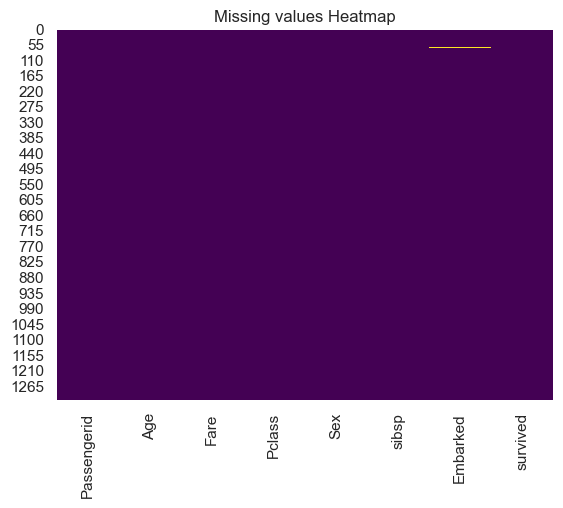

In [19]:
sns.heatmap(df.isnull(), cbar=False, color="red", cmap="viridis")
plt.title("Missing values Heatmap")
plt.show()

In [20]:
# Drop the uneccessary columns

In [21]:
df.drop(columns=['sibsp'], inplace = True )

In [22]:
# fill missing values in column embarked

In [23]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [24]:
# 3. Exploratory Data Analysis

In [25]:
# (univariate analysis) Histograms for numerical variables

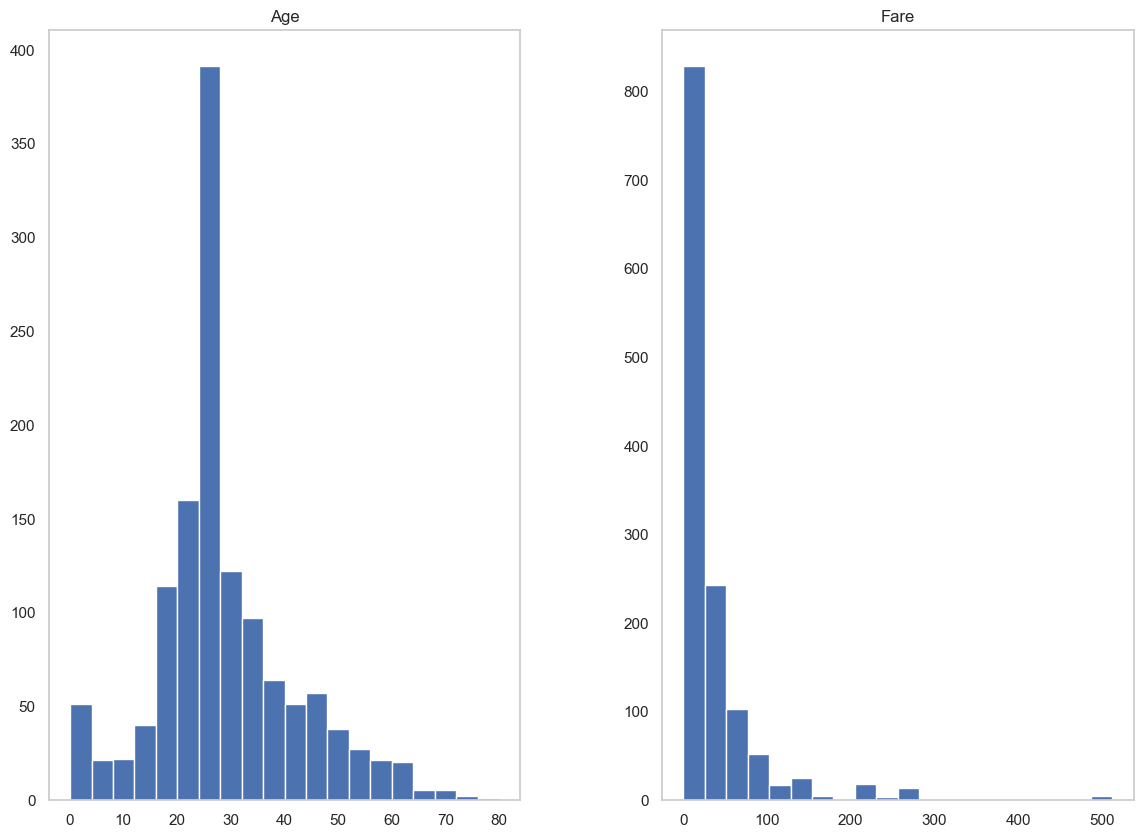

In [26]:
df[['Age','Fare']].hist(bins=20, figsize=(14, 10), grid=False)
plt.show()

In [27]:
# Barplot for categorical variables
# Passengerid is excluded because it contains unique values for each passenger

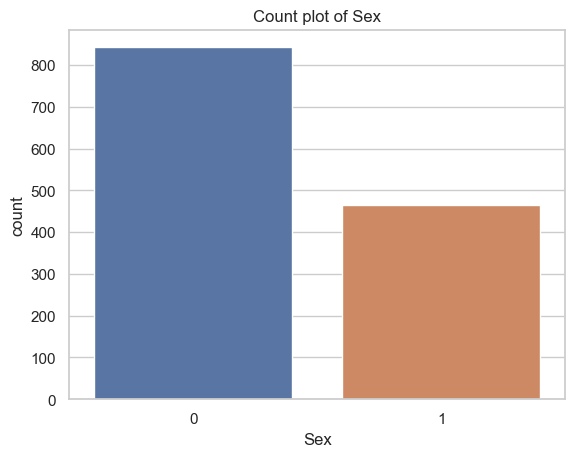

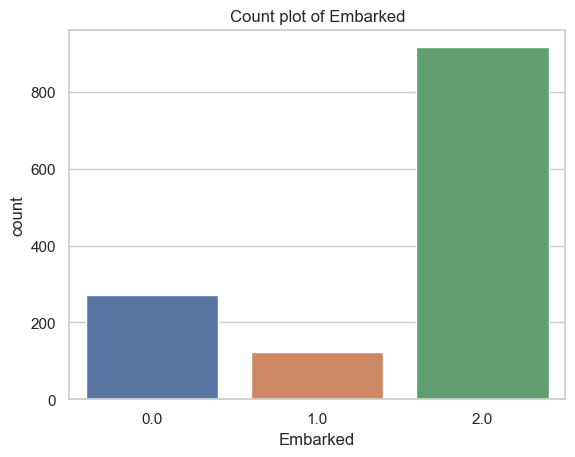

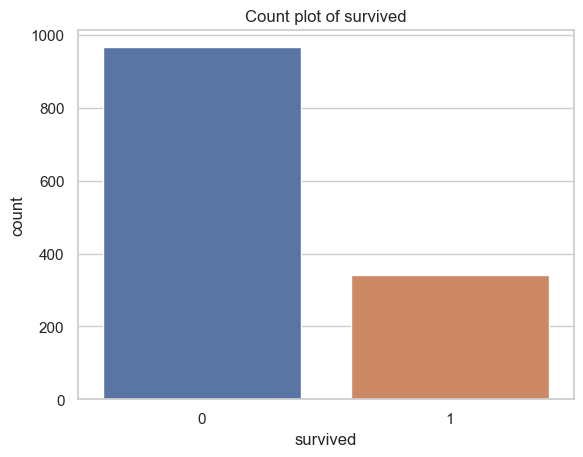

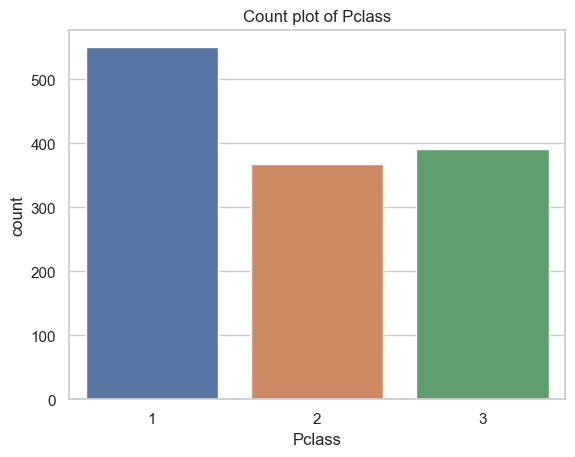

In [28]:
categorical_features = ['Sex','Embarked','survived','Pclass']
for feature in categorical_features:
    sns.countplot(data = df, x = feature)
    plt.title(f"Count plot of {feature}")
    plt.show()

In [29]:
# Bivariate analysis
# box plot Age Vs survived

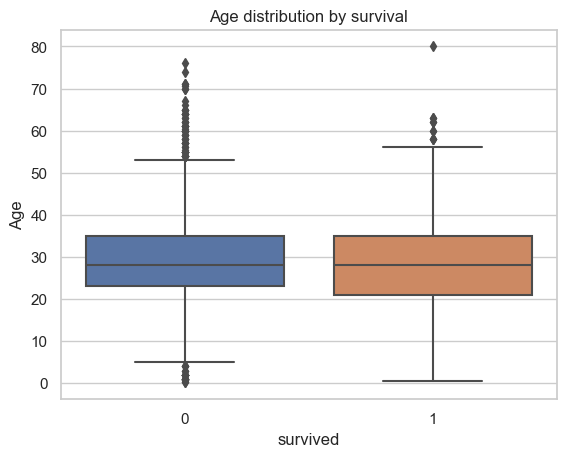

In [30]:
sns.boxplot(data = df, x = 'survived', y = 'Age')
plt.title("Age distribution by survival")
plt.show()

In [31]:
# Box plot  Pclass Vs survived

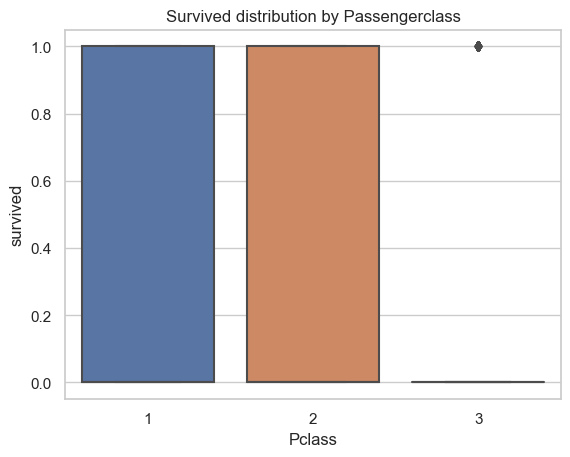

In [32]:
sns.boxplot(data = df, x = 'Pclass', y = 'survived')
plt.title("Survived distribution by Passengerclass")
plt.show()

In [33]:
#survival rate by Passenger class and sex

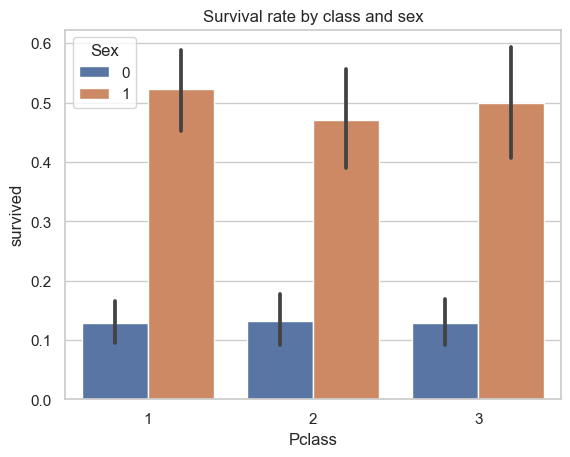

In [34]:
sns.barplot(data = df, x = 'Pclass', y = 'survived', hue = 'Sex')
plt.title("Survival rate by class and sex")
plt.show()

In [35]:
# Female = 0, Male = 1

In [36]:
#Multivariate analysis
#correlation heatmap

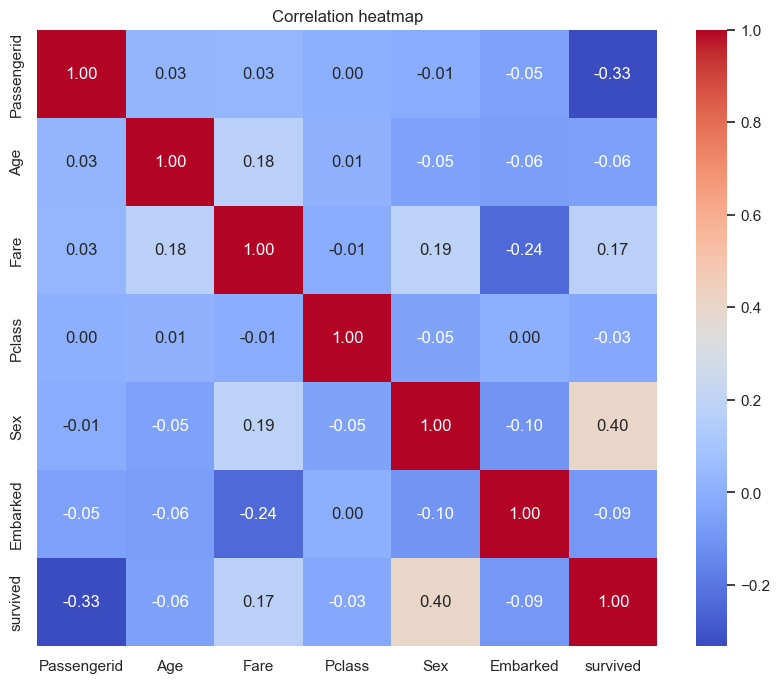

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation heatmap")
plt.show()

In [38]:
#pair plaot

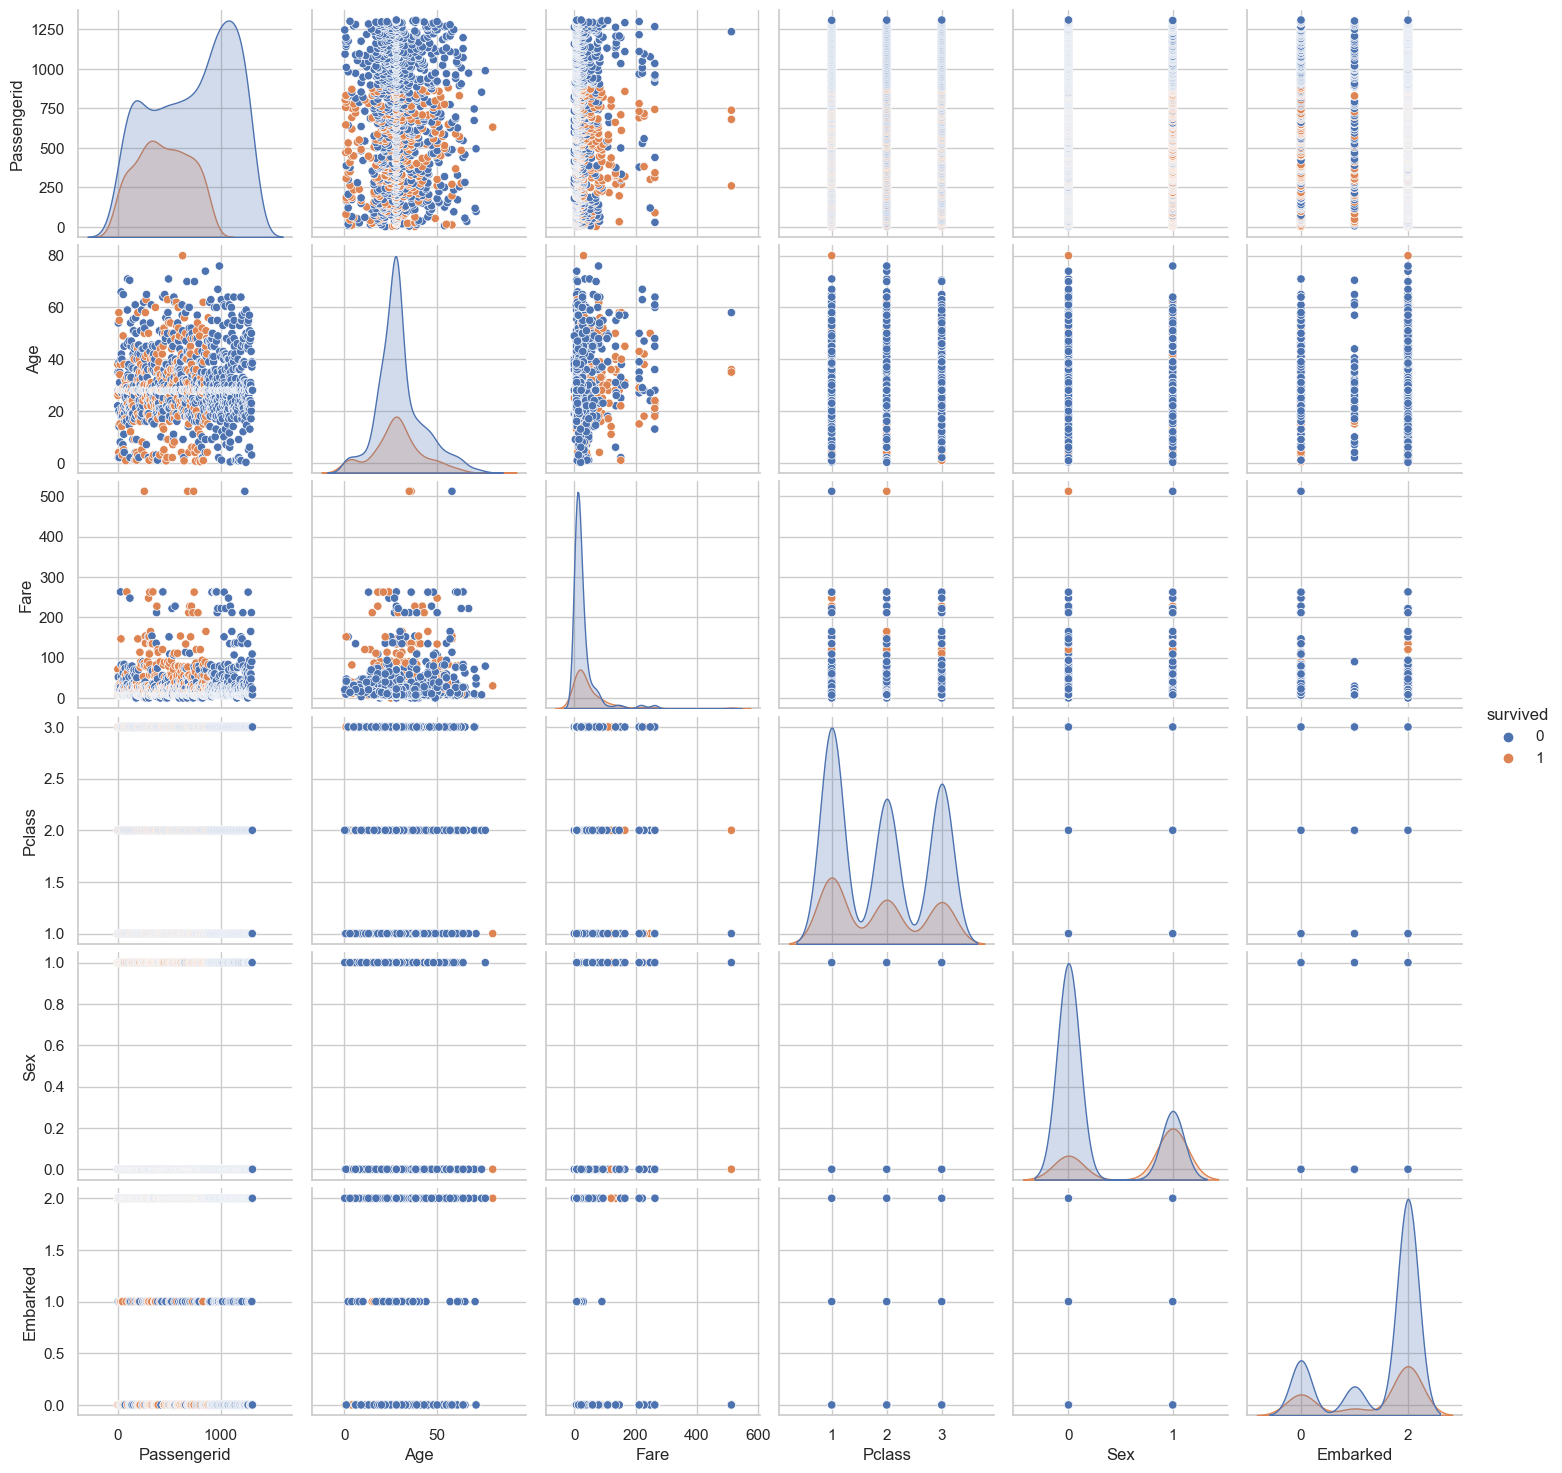

In [39]:
sns.pairplot(df, hue = 'survived', diag_kind = 'kde')
plt.show()

In [40]:
#pivot table for survival rate by class and gender

In [41]:
pivot_table = df.pivot_table(values = 'survived', index ='Pclass', columns = 'Sex', aggfunc = 'mean' )
print(pivot_table)

Sex            0         1
Pclass                    
1       0.128205  0.522613
2       0.132420  0.469799
3       0.128205  0.500000


In [42]:
# 4. Define Features and Target

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
X = df[['Pclass','Age','Fare','Sex','Embarked']]
y = df['survived']

In [45]:
# split dataset to train and test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# train a nrandomforest classifier
# Initialize the RandomForestClassifier and train the model

In [49]:
model = RandomForestClassifier(random_state = 42)

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# make predictions and evaluate the model

In [52]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [61]:
print(f"Accuracy: {accuracy:.2f}")

print("Confusion matrix : ")
print(conf_matrix)

print("Classification report : ")
print(class_report)

Accuracy: 0.76
Confusion matrix : 
[[161  28]
 [ 36  37]]
Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       189
           1       0.57      0.51      0.54        73

    accuracy                           0.76       262
   macro avg       0.69      0.68      0.69       262
weighted avg       0.75      0.76      0.75       262



In [62]:
# plot the confusion matrix

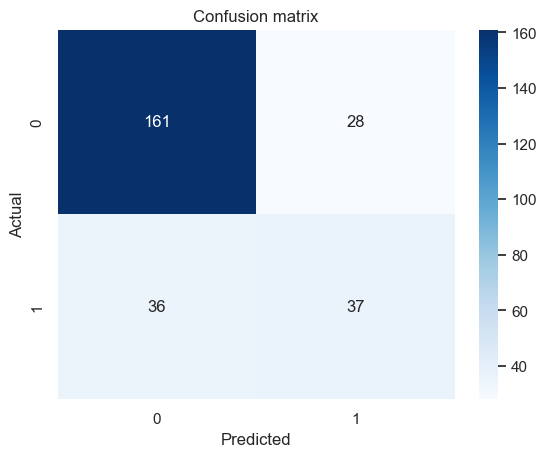

In [63]:
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()